In [2]:
import numpy as np
import random
import pdb
import matplotlib.pyplot as plt

In [7]:
class LogRegression(object):
    
    # Initial setup 
    
    def __init__(self, weight_size): 
       # pass
        self.weight_initializer(weight_size) 
         
    # Log regrssion model development
    
    def activation(self, x_train):
        
        # Feedforward propogation 
        # Nonlinear neurons
        
    #    ones = np.zeros(x.shape[0],1)
        
      #  x = np.hstack((ones, x))
      #  y = np.dot(x, w)
        x = x_train
      #  a = [sigmoid(np.dot(x, w) + b) for w, b in zip(self.weights, self.biases)]
        a = sigmoid(np.dot(x, self.weights) + self.biases)
        return a
    
    # Fitting model -  parameter learning
    
    def weight_initializer(self, weight_size):
        """Initialize the weights using a Gaussian distribution with mean 0
        and standard deviation 1.  Initialize the biases using a
        Gaussian distribution with mean 0 and standard deviation 1."""
        
        self.weights = np.random.randn(weight_size + 1, 1) # (N+1 x 1)
       # self.weights = np.zeros(1 + x_train.shape[1])
        self.weights = self.weights[1:]
        self.biases  = self.weights[0]
        
    
    def SGD(self, epochs, alpha, lmbda, x_train, x_test, y_train, y_test, batch = None, batch_size = None, 
            monitor_test_cost = False,
            monitor_training_cost = False):
        
        n_train = x_train.shape[0]
        test_cost, training_cost = [], []
        
     #   self.weights = np.zeros((x_train.shape[1]+1, 1))
     #   self.weights = self.weights[1:]
     #   self.biases  = self.weights[0]
        
        for j in range(epochs):
            random.shuffle(x_train)  # cropping the x_train data to 200 samples
            random.shuffle(y_train)
            if batch == 'mini_batch':
                    x_batches = [x_train[k : k + batch_size] for k in range(0, n_train, batch_size)]
                    y_batches = [y_train[k : k + batch_size] for k in range(0, n_train, batch_size)]
                    for mini_batch_x_train in x_batches:
                        for mini_batch_y_train in y_batches:
                           # print(len(mini_batch_y_train)) #
                            # stochastic gradient descent
                            self.param_update(mini_batch_x_train, mini_batch_y_train, alpha, lmbda, n_train)
            elif batch  == 'batch':
                #print("training/test  {}/{}".format(y_train.shape, self.activation(x_train).shape))
                self.param_update(x_train, y_train, alpha, lmbda, n_train) # gradient descent

            
           # print("Epoch {} complete".format(j))   
                
            if monitor_test_cost:
                cost = self.cost(x_test, y_test, lmbda)
                test_cost.append(cost)
                if j % 50 == 0:
                    print("Epoch {}: Cost on test data: {}".format(j, cost))
            if monitor_training_cost:
                #print("training/test  {}/{}".format(x_train.shape, y_train.shape))   
                
                cost = self.cost(x_train, y_train, lmbda)
                training_cost.append(cost)
                if j % 50 == 0: 
                    print("Epoch {}: Cost on training data: {}".format(j, cost))
            
         #   if test_data:
         #       print("Epoch {} : {} / {}".format(j, self.predict(test_data),n_test));
         #   else:
         #       print("Epoch {} complete".format(j))
           
        return  test_cost, training_cost, self.weights, self.biases
           
            
       
    def param_update(self, x_train, y_train, alpha, lmbda, n):
        
        """Update the network's weights and biases by applying
        gradient descent learning"""
                               
        n_samples = x_train.shape[0] # batch or mini_batch sample size
        
        y_predict = self.activation(x_train)
          
        error = y_predict - y_train
        #print("training/test  {}".format(error.shape)
        # weight and bias update
        dw =  (1 / n_samples) * np.dot(x_train.T, error)
        db =  (1 / n_samples) * np.sum(error)
       
        # memory allocation for nabla_w and nabla_b parameters
        #   nabla_b = [np.zeros(b.shape) for b in self.biases]
        #   nabla_w = [np.zeros(w.shape) for b in self.weights]              ]
        
        #********** WHY THIS SHIT DOES NOT WORK ???? FUCK IT! ******* 
        
        #self.weights = [w - alpha * dw for w in self.weights]
        #self.biases  = [b - alpha * db for b in self.biases]
       #**********************************************************
    
       # dw = (1 / n_samples) * np.dot(x_train.T, (y_predict - y_train))
       # db = (1 / n_samples) * np.sum(y_predict - y_train)

        # Step 5: Update the parameters
       # self.weights -= alpha * dw
       # self.biases  -= self.biases - alpha * db
        if n_samples < n:
            self.weights -= (1 - alpha * (lmbda/n_samples)) * self.weights - alpha * dw
            self.biases  -= self.biases - alpha * db
        else:
            
            self.weights -= (1 - alpha * (lmbda/n_samples)) * self.weights - (alpha/n) * dw
            self.biases  -= self.biases - alpha * db
    
    
        return self.weights, self.biases
        
    
        # def backpropogate(self, x_train, y_train) 
    
        # compute cost and cost derivative

 
    def cost(self, x_train, y_train, lmbda):
        
        y_predict = self.activation(x_train) # y_predict
        cost = (1/x_train.shape[0])*np.sum(np.nan_to_num(-y_train*np.log(y_predict)-(1-y_train)*np.log(1-y_predict))) 
        regularizer = 0.5*(lmbda/(x_train.shape[0])) * sum(np.linalg.norm(w)**2 for w in self.weights)
        cost += regularizer 
        return cost
      
   
    def predict(self, x):
        
        # Classify x as class 1 if activation > 0.5, else classify as class 0
        y_predict = self.activation(x)
        y_predicted_labels = np.where(y_predict >= 0.5, 1,0) 
        
        return y_predicted_labels[:, newaxis]
    
    def predict_prob(self,x):
        a = self.activation(x)
        pred_prob = self.sigmoid(a)
        return pred_prob
    
    
def sigmoid(z):
        
    return 1/(1 + np.exp(-z))








Epoch 0: Cost on test data: 0.6967661366732733
Epoch 0: Cost on training data: 0.6931012476690678
Epoch 50: Cost on test data: 0.7934598264187944
Epoch 50: Cost on training data: 0.8068792955572839


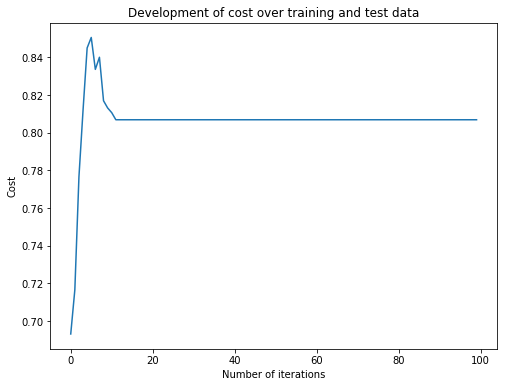

In [16]:
# Training the model
x_train = np.random.randn(200,13)
x_test = np.random.randn(200,13)
y_train = np.random.randint(2, size = x_train.shape[0])[:, np.newaxis] 
y_test = np.random.randint(2, size = x_train.shape[0])[:, np.newaxis] 
epochs = 100
alpha  = 1
batch_size = 20
lmbda = 10
weight_size = x_train.shape[1]
logreg = LogRegression(weight_size) # initialization


test_cost, training_cost, weights, biases = logreg.SGD(epochs, alpha, lmbda, x_train, x_test,  y_train, y_test, batch = 'batch', 
                                    batch_size = batch_size,
                                    monitor_test_cost = True, monitor_training_cost = True)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.plot(np.arange(epochs), training_cost)
#ax.plot(np.arange(epochs), test_cost)
ax.set_title("Development of cost over training and test data")
ax.set_xlabel("Number of iterations")
ax.set_ylabel("Cost")
plt.show() 

In [20]:
!git 

commit 2eeaa95dd1f55d355dc82b3435632ec685804cfa
Author: Rikeb <bekirdec@gmail.com>
Date:   Thu Apr 5 17:46:19 2018 +0200

    done
